# Reproduce Results

**functions imported from utils.utils**

This notebook loads the trained models from the disk and shows the obtained results. 

## Imports

In [89]:
from utils.utils import *

In [90]:
import pandas as pd
from skseq.id_feature import IDFeatures
from tensorflow.keras.models import load_model
from skseq.extended_feature import ExtendedFeatures
from skseq.structured_perceptron import StructuredPerceptron

In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Train, Test and Tiny Test Datasets

In [92]:
train = pd.read_csv("data/train_data_ner.csv")
test = pd.read_csv("data/test_data_ner.csv")

In [93]:
X_train, y_train = get_data_target_sets(train)
X_test, y_test = get_data_target_sets(test)
X_tiny, y_tiny = get_tiny_test()

Processing: 100%|█████████████████████████████████████████████████████████| 38367/38367 [00:51<00:00, 741.29sentence/s]


### Corpus Creation

In [94]:
X_train_cleaned = [handle_nan(seq) for seq in X_train]
for seq in X_train_cleaned:
    validate_input(seq)

X_test_cleaned = [handle_nan(seq) for seq in X_test]
for seq in X_test_cleaned:
    validate_input(seq)

X_tiny_cleaned = [handle_nan(seq) for seq in X_tiny]
for seq in X_tiny_cleaned:
    validate_input(seq)

y_train_cleaned = [handle_nan(seq) for seq in y_train]
for seq in y_train_cleaned:
    validate_input(seq)

y_test_cleaned = [handle_nan(seq) for seq in y_test]
for seq in y_test_cleaned:
    validate_input(seq)

y_tiny_cleaned = [handle_nan(seq) for seq in y_tiny]
for seq in y_tiny_cleaned:
    validate_input(seq)

In [95]:
word_dict, tag_dict, tag_dict_rev = create_corpus(X_train_cleaned, y_train_cleaned)

### Sequence List Creation

In [96]:
train_seq = create_sequence_list(word_dict, tag_dict, X_train_cleaned, y_train_cleaned)

Adding sequences: 100%|████████████████████████████████████████████████████| 38366/38366 [09:07<00:00, 70.07sequence/s]


### True Tags Creation

In [97]:
train_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_train_cleaned]
y_train_true = [tag for array in train_tag_pos for tag in array]

test_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_test_cleaned]
y_test_true = [tag for array in test_tag_pos for tag in array]

tiny_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_tiny_cleaned]
y_tiny_true = [tag for array in tiny_tag_pos for tag in array]

## Model Evaluation

## Structured Perceptron with Default Features

### Model Loading

In [98]:
feature_mapper = IDFeatures(train_seq)
feature_mapper.build_features()

sp = StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp_c = StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp.load_model(dir='fitted_models/01_SP_Default_Features')
sp_c.load_model(dir='fitted_models/01C_SP_Default_Features')

### Model Evaluation

#### Train Dataset

##### Model Without Cython

In [99]:
y_train_pred = predict_SP(sp, X_train_cleaned)

Predicting tags: 100%|████████████████████████████████████████████████████| 38366/38366 [04:28<00:00, 142.93sequence/s]


Accuracy: 0.9683
F1 Score: 0.9682


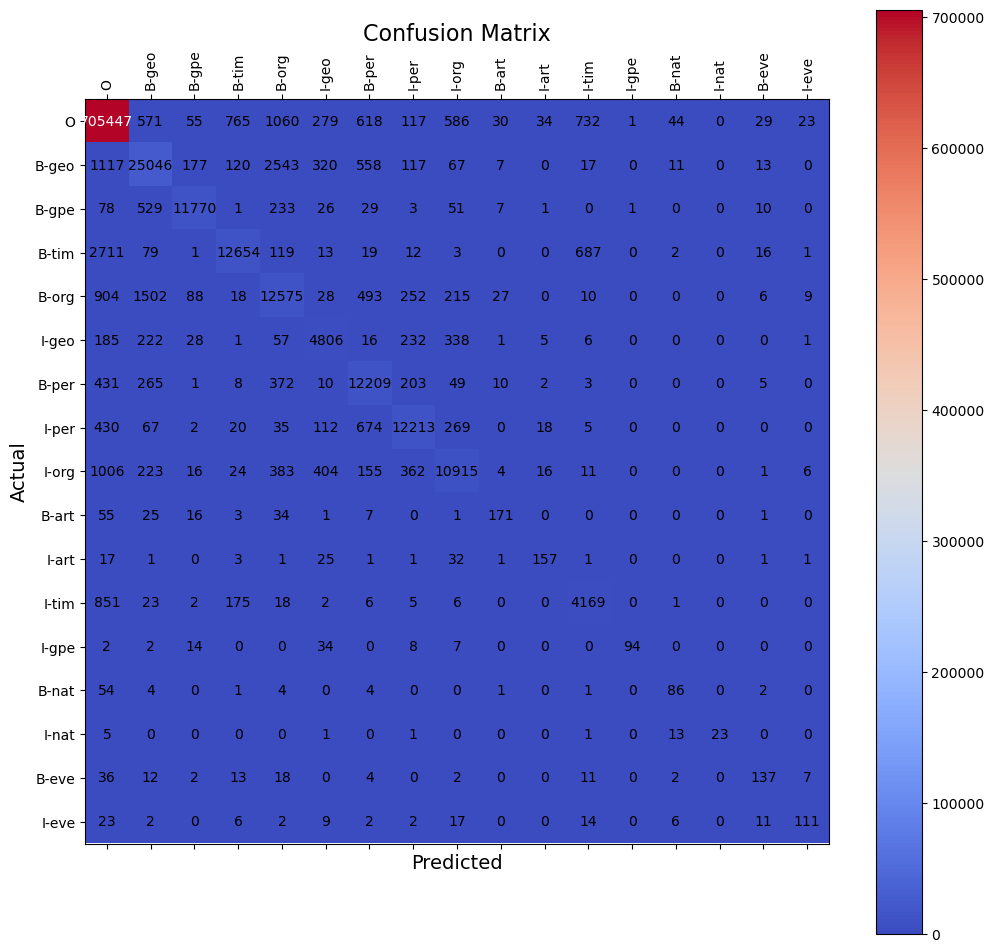

In [100]:
evaluate(y_train_true, y_train_pred, tag_dict_rev)

##### Model With Cython

In [101]:
y_train_pred_c = predict_SP(sp_c, X_train_cleaned)

Predicting tags: 100%|████████████████████████████████████████████████████| 38366/38366 [04:39<00:00, 137.05sequence/s]


Accuracy: 0.9683
F1 Score: 0.9682


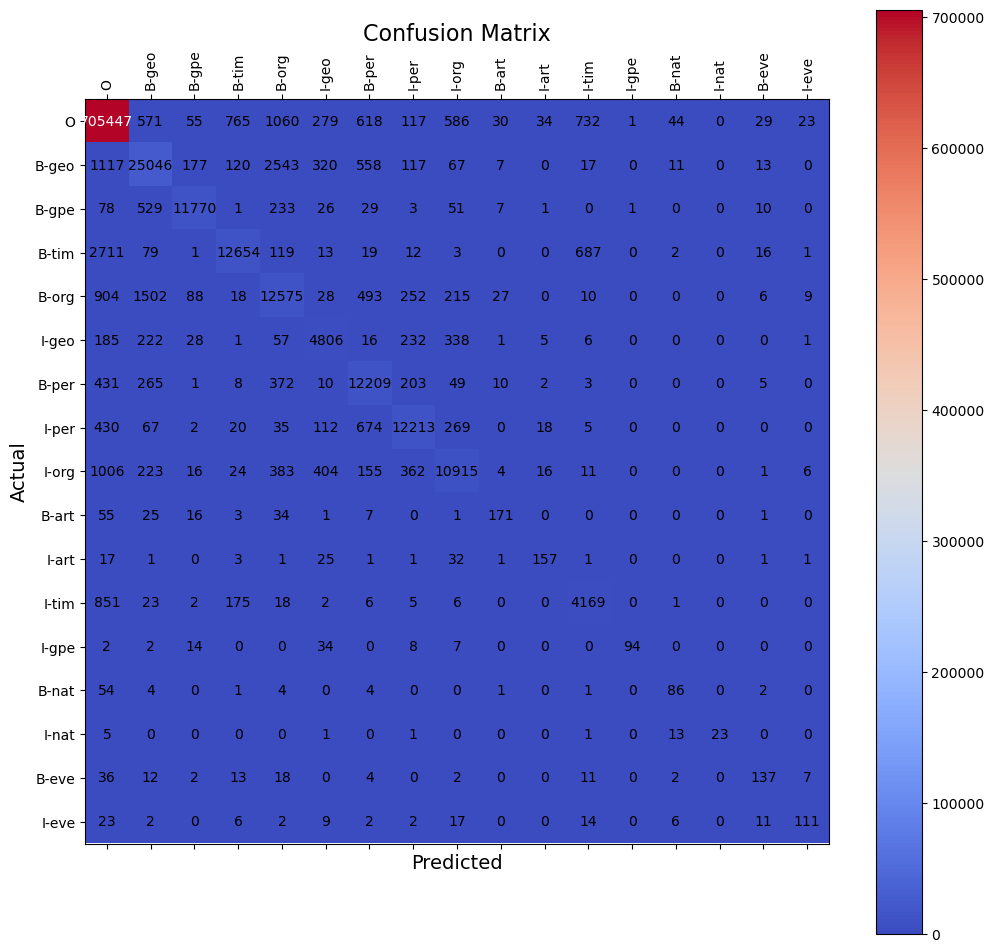

In [102]:
evaluate(y_train_true, y_train_pred_c, tag_dict_rev)

#### Test Dataset

##### Model Without Cython

In [103]:
 y_test_pred = predict_SP(sp, X_test_cleaned)

Predicting tags: 100%|████████████████████████████████████████████████████| 38367/38367 [04:28<00:00, 142.90sequence/s]


Accuracy: 0.8808
F1 Score: 0.8579


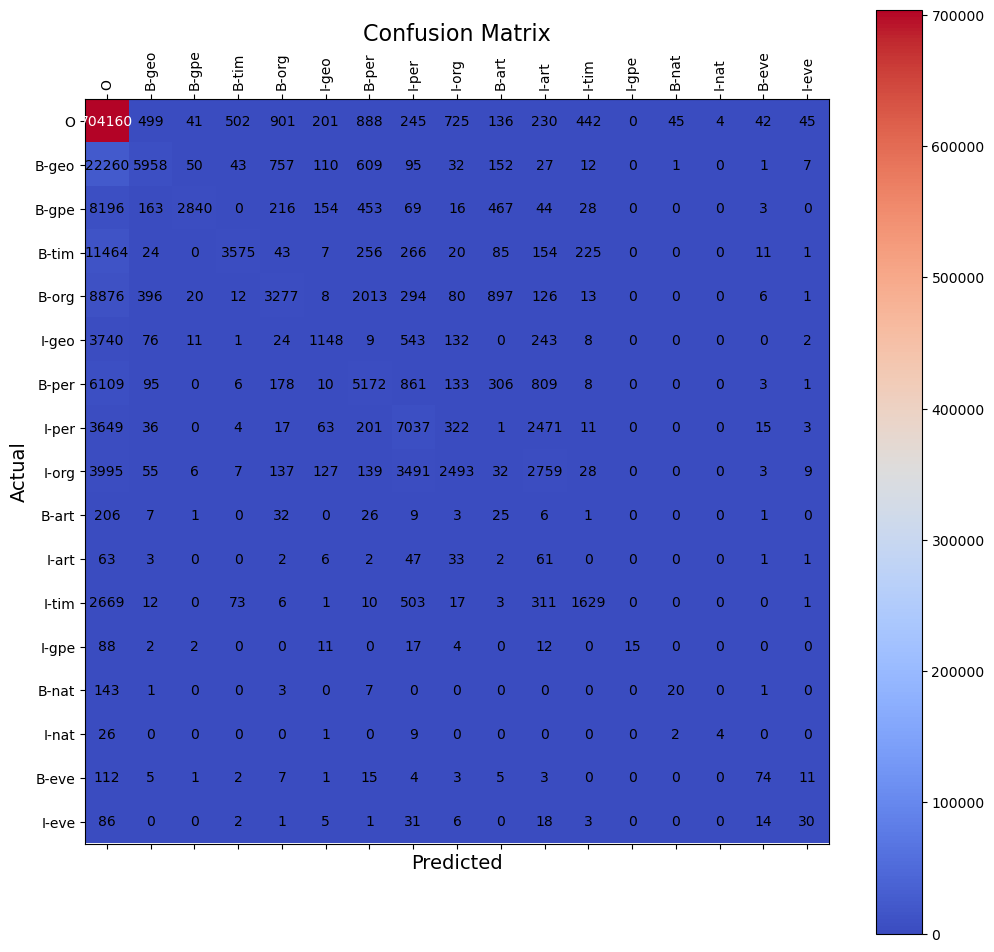

In [104]:
evaluate(y_test_true, y_test_pred, tag_dict_rev)

##### Model With Cython

In [105]:
y_test_pred_c = predict_SP(sp_c, X_test_cleaned)

Predicting tags: 100%|████████████████████████████████████████████████████| 38367/38367 [04:36<00:00, 138.90sequence/s]


Accuracy: 0.8808
F1 Score: 0.8579


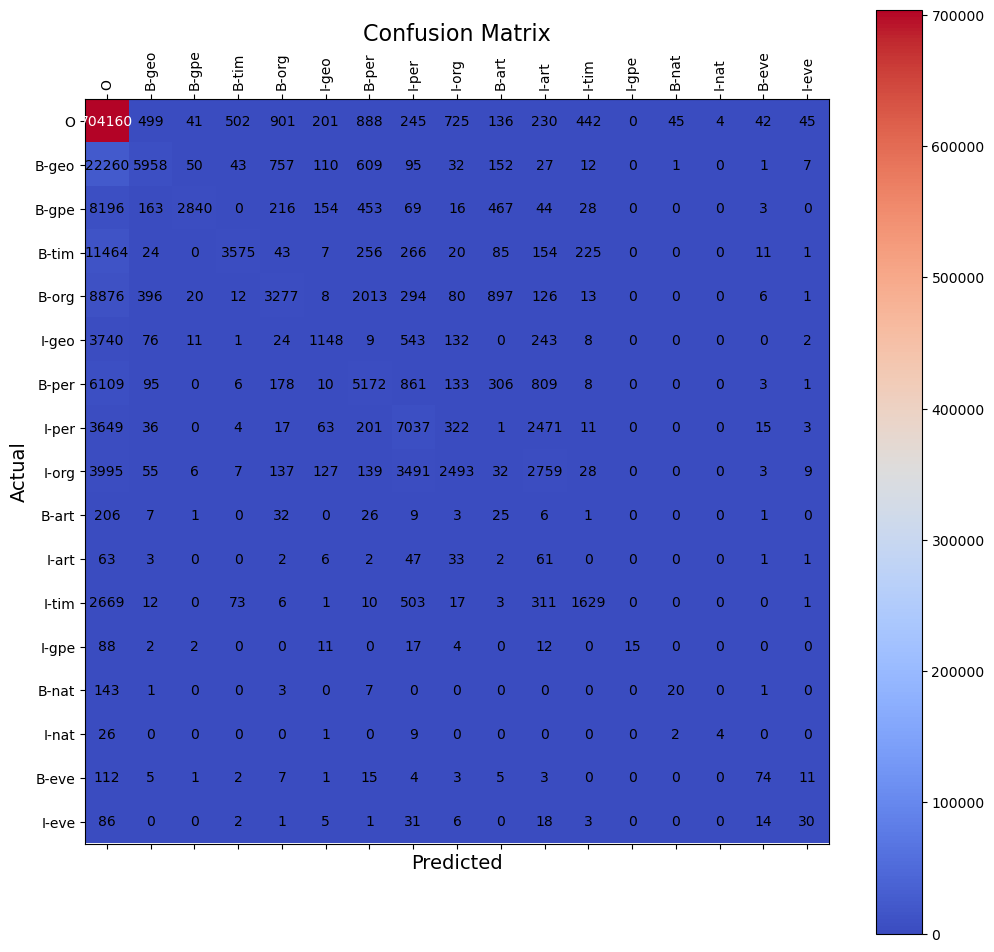

In [106]:
evaluate(y_test_true, y_test_pred_c, tag_dict_rev)

#### Tiny Test Dataset

##### Model Without Cython

In [107]:
y_tiny_pred = predict_SP(sp, X_tiny_cleaned)

Predicting tags: 100%|██████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 244.12sequence/s]


In [108]:
print_tiny_test_prediction(X_tiny_cleaned, sp, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/O ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/O would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/O is/O a/O great/O company/O ./O 

I/O really/O lov

Accuracy: 0.9041
F1 Score: 0.9036


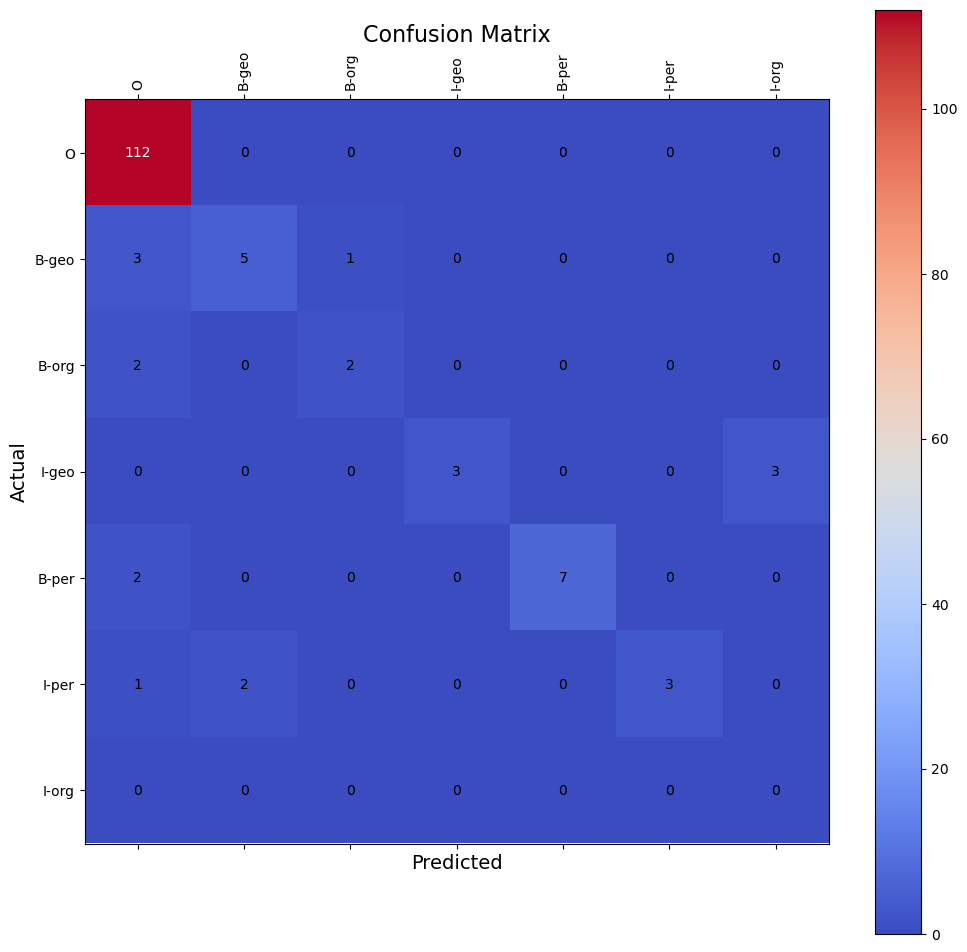

In [109]:
evaluate(y_tiny_true, y_tiny_pred, tag_dict_rev)

##### Model With Cython

In [110]:
y_tiny_pred_c = predict_SP(sp_c, X_tiny_cleaned)

Predicting tags: 100%|██████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 230.96sequence/s]


In [111]:
print_tiny_test_prediction(X_tiny_cleaned, sp_c, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/O ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/O would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/O is/O a/O great/O company/O ./O 

I/O really/O lov

Accuracy: 0.9041
F1 Score: 0.9036


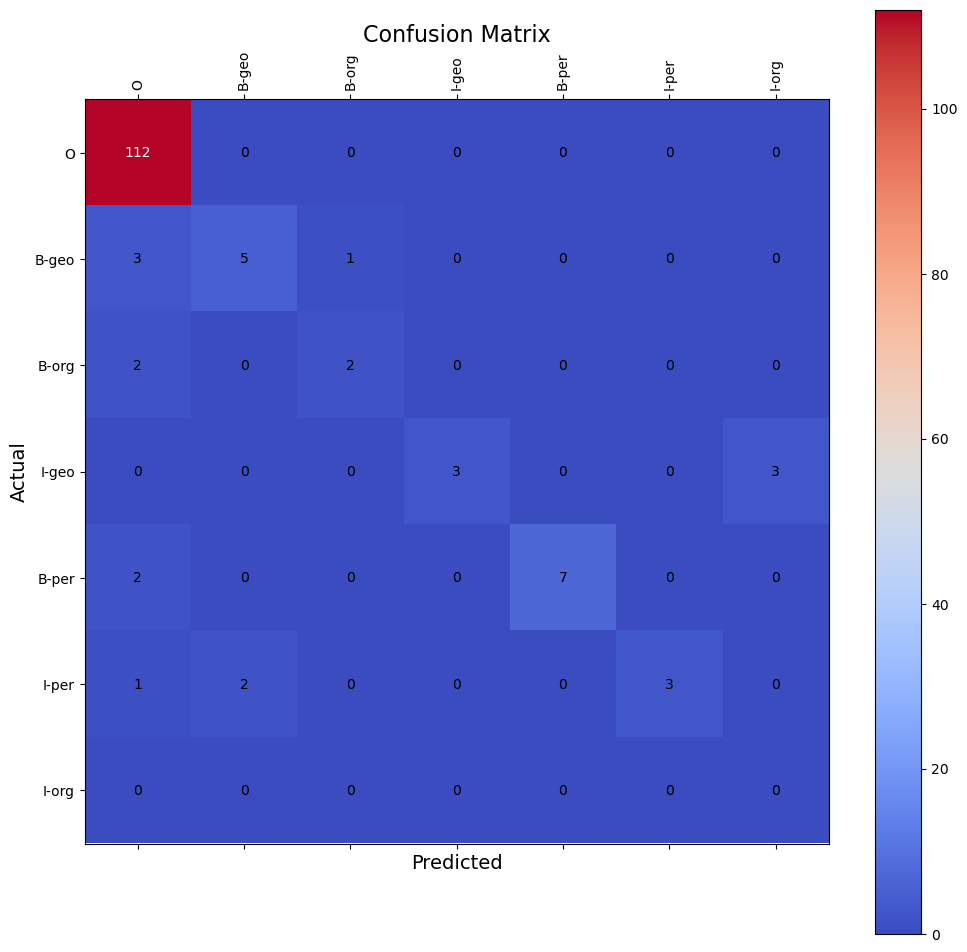

In [112]:
evaluate(y_tiny_true, y_tiny_pred_c, tag_dict_rev)

## Structured Perceptron with New Features

### Model Loading

In [113]:
feature_mapper_ext = ExtendedFeatures(train_seq)
feature_mapper_ext.build_features()

sp_ext = StructuredPerceptron(word_dict, tag_dict, feature_mapper_ext)
sp_ext_c = StructuredPerceptron(word_dict, tag_dict, feature_mapper_ext)
sp_ext.load_model(dir='fitted_models/02_SP_Extended_Features')
sp_ext_c.load_model(dir='fitted_models/02C_SP_Extended_Features')

### Model Evaluation

#### Train Dataset

##### Model Without Cython

In [114]:
y_train_pred = predict_SP(sp_ext, X_train_cleaned)

Predicting tags: 100%|████████████████████████████████████████████████████| 38366/38366 [04:49<00:00, 132.47sequence/s]


Accuracy: 0.9604
F1 Score: 0.9617


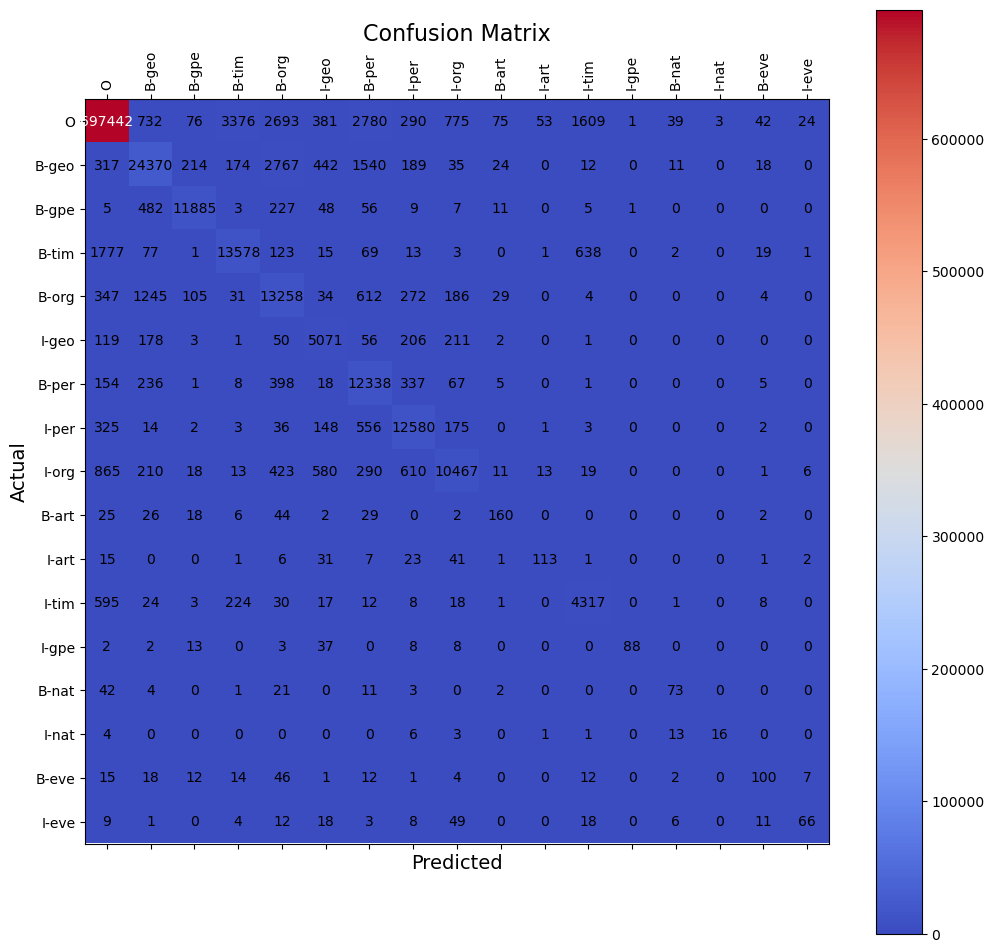

In [115]:
evaluate(y_train_true, y_train_pred, tag_dict_rev)

##### Model With Cython

In [116]:
y_train_pred_c = predict_SP(sp_ext_c, X_train_cleaned)

Predicting tags: 100%|████████████████████████████████████████████████████| 38366/38366 [04:33<00:00, 140.04sequence/s]


Accuracy: 0.9604
F1 Score: 0.9617


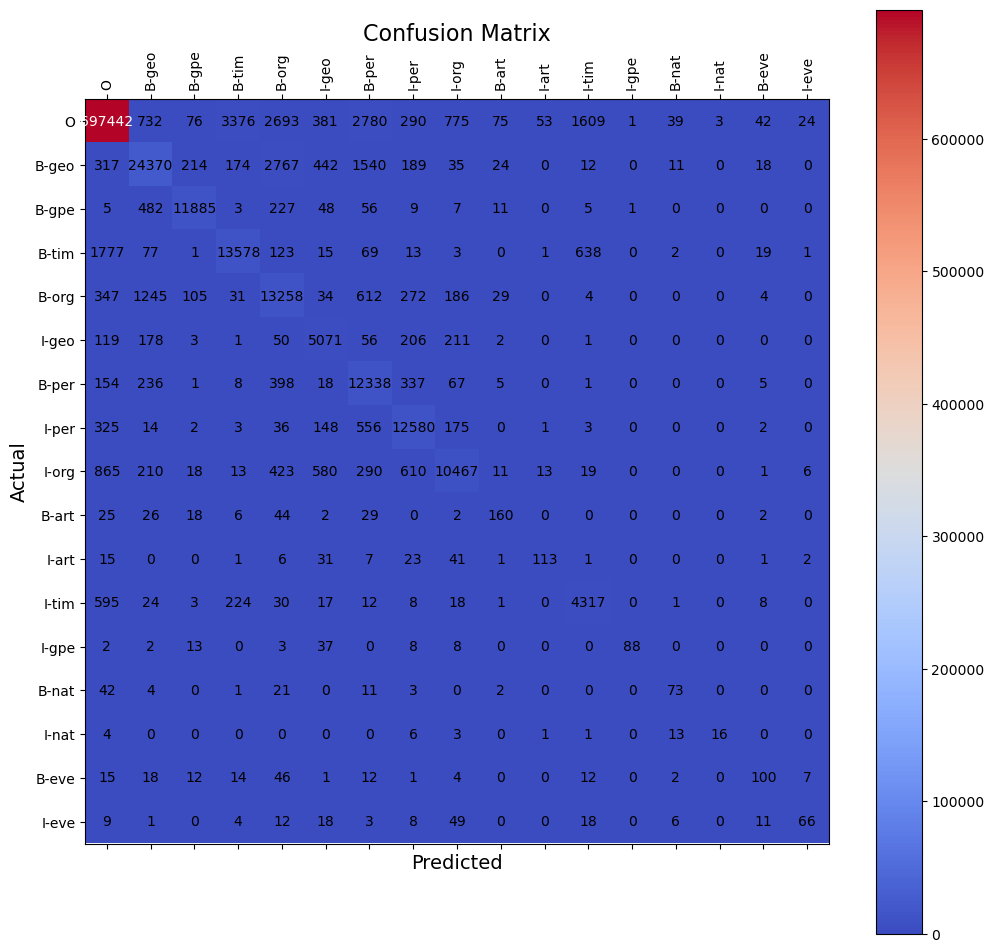

In [117]:
evaluate(y_train_true, y_train_pred_c, tag_dict_rev)

#### Test Dataset

##### Model Without Cython

In [118]:
y_test_pred = predict_SP(sp_ext, X_test_cleaned)

Predicting tags: 100%|████████████████████████████████████████████████████| 38367/38367 [04:55<00:00, 129.98sequence/s]


Accuracy: 0.8975
F1 Score: 0.9004


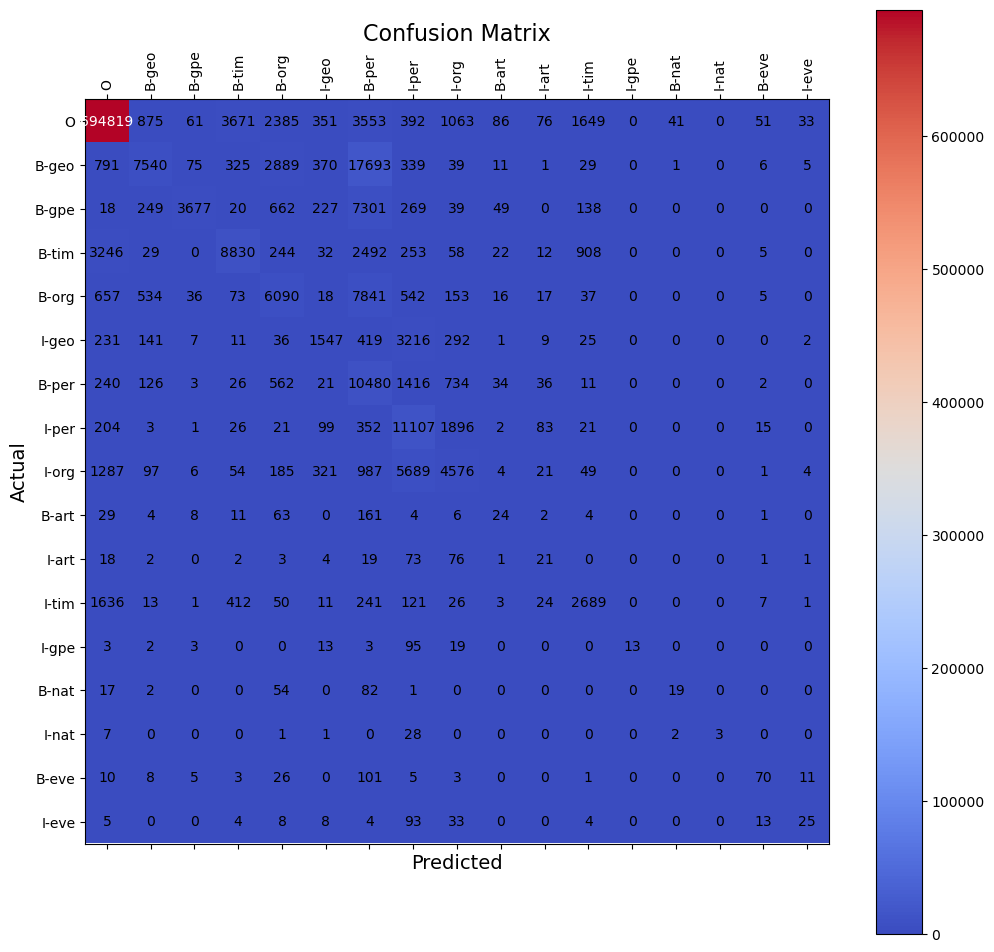

In [119]:
evaluate(y_test_true, y_test_pred, tag_dict_rev)

##### Model With Cython

In [120]:
y_test_pred_c = predict_SP(sp_ext_c, X_test_cleaned)

Predicting tags: 100%|████████████████████████████████████████████████████| 38367/38367 [04:52<00:00, 131.11sequence/s]


Accuracy: 0.8975
F1 Score: 0.9004


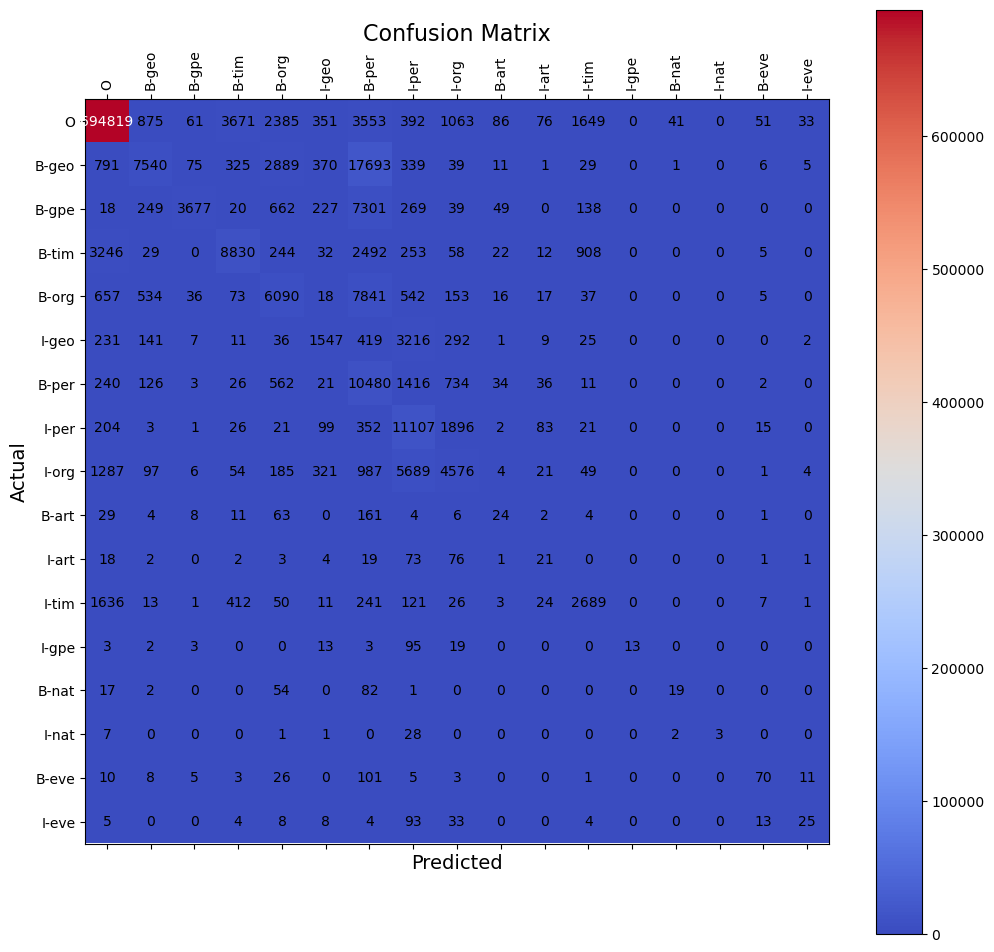

In [121]:
evaluate(y_test_true, y_test_pred_c, tag_dict_rev)

#### Tiny Test Dataset

##### Model Without Cython

In [122]:
y_tiny_pred = predict_SP(sp_ext, X_tiny_cleaned)

Predicting tags: 100%|██████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 195.50sequence/s]


In [123]:
print_tiny_test_prediction(X_tiny_cleaned, sp_ext, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/B-per cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/B-per ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/B-org would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/B-org though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/B-org is/O a/O great/O company/O ./

Accuracy: 0.9452
F1 Score: 0.9379


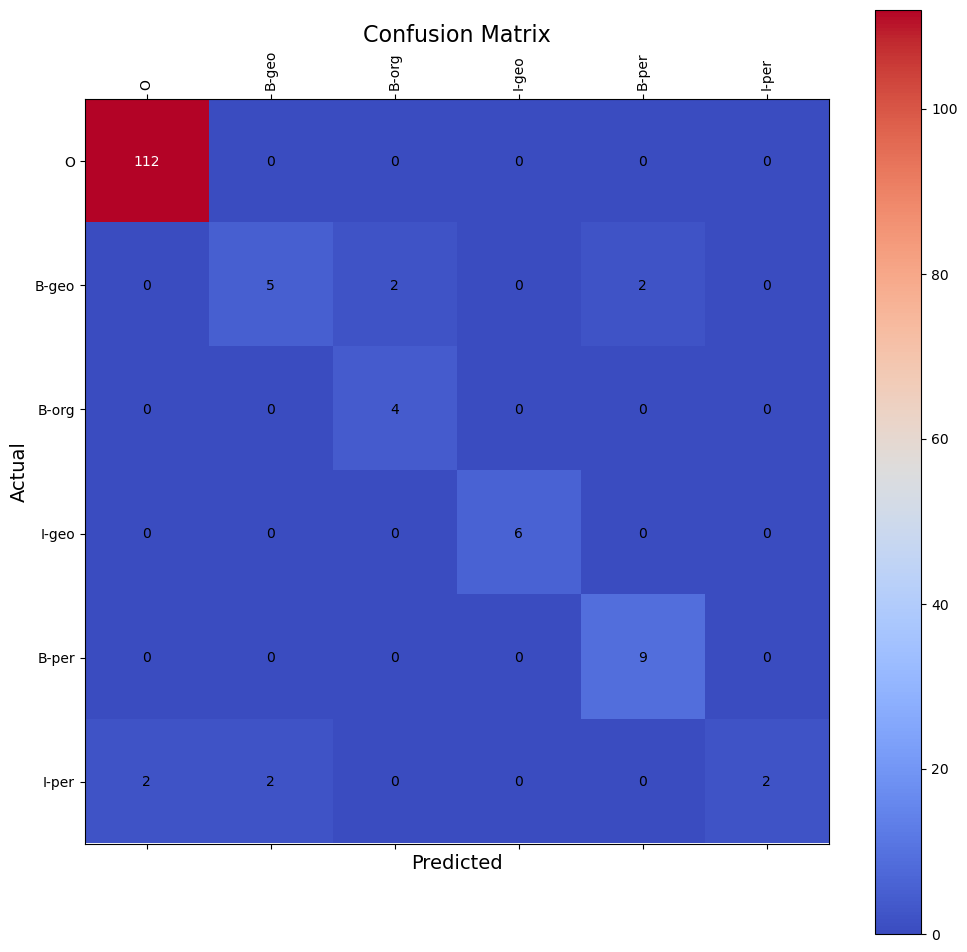

In [124]:
evaluate(y_tiny_true, y_tiny_pred, tag_dict_rev)

##### Model With Cython

In [125]:
y_tiny_pred_c = predict_SP(sp_ext_c, X_tiny_cleaned)

Predicting tags: 100%|██████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 211.98sequence/s]


In [126]:
print_tiny_test_prediction(X_tiny_cleaned, sp_ext_c, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/B-per cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/B-per ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/B-org would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/B-org though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/B-org is/O a/O great/O company/O ./

Accuracy: 0.9452
F1 Score: 0.9379


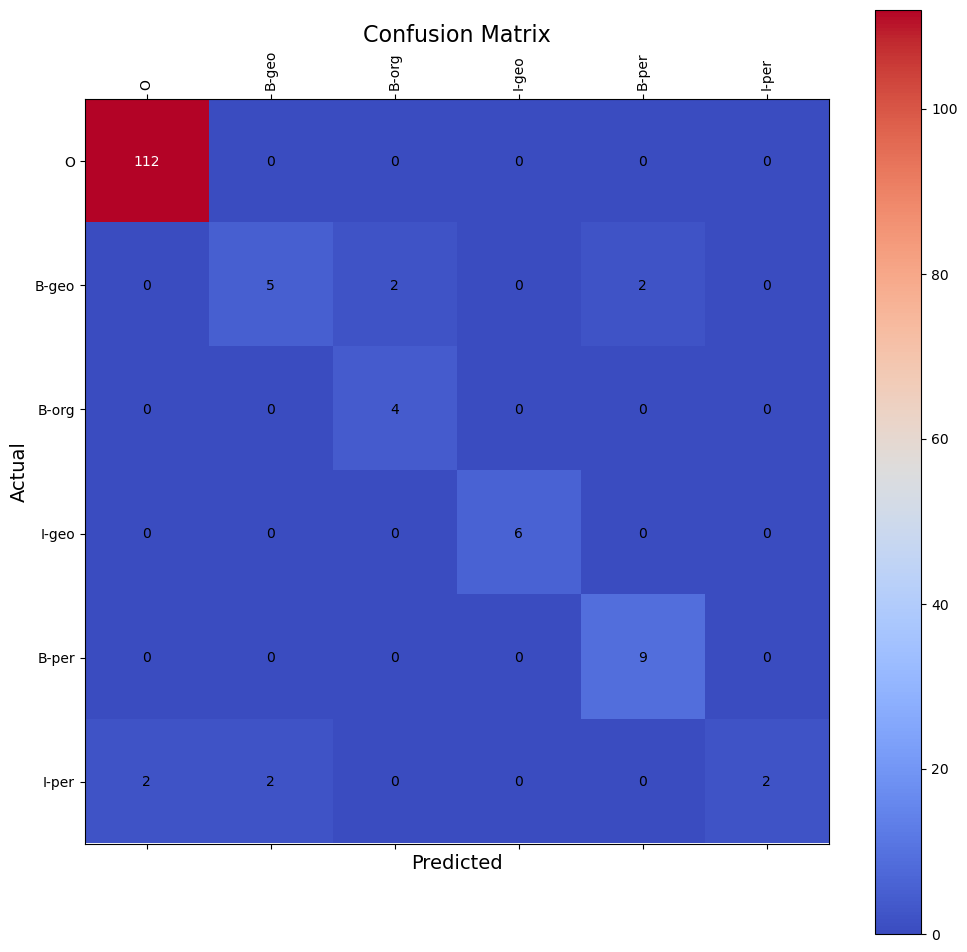

In [127]:
evaluate(y_tiny_true, y_tiny_pred_c, tag_dict_rev)

## Deep Learning Approach: Bi-LSTM

### Data Preparation

In [128]:
X_train, y_train, num_words, num_tags, word2idx, tag2idx = preprocess_BiLSTM_train_data(train)
X_test, y_test = preprocess_BiLSTM_test_data(test, word2idx, tag2idx, num_words)

In [129]:
tiny_test = get_tiny_test_lstm()
X_tiny, y_tiny = preprocess_BiLSTM_test_data(tiny_test, word2idx, tag2idx, num_words)

### Model Loading

In [130]:
lstm_model = load_model('fitted_models/03_BiLSTM.keras')

### Model Evaluation

#### Train Dataset

In [131]:
y_train_pred = predict_lstm(lstm_model, X_train)

1199/1199 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step


Accuracy: 0.8400
F1 Score: 0.9948


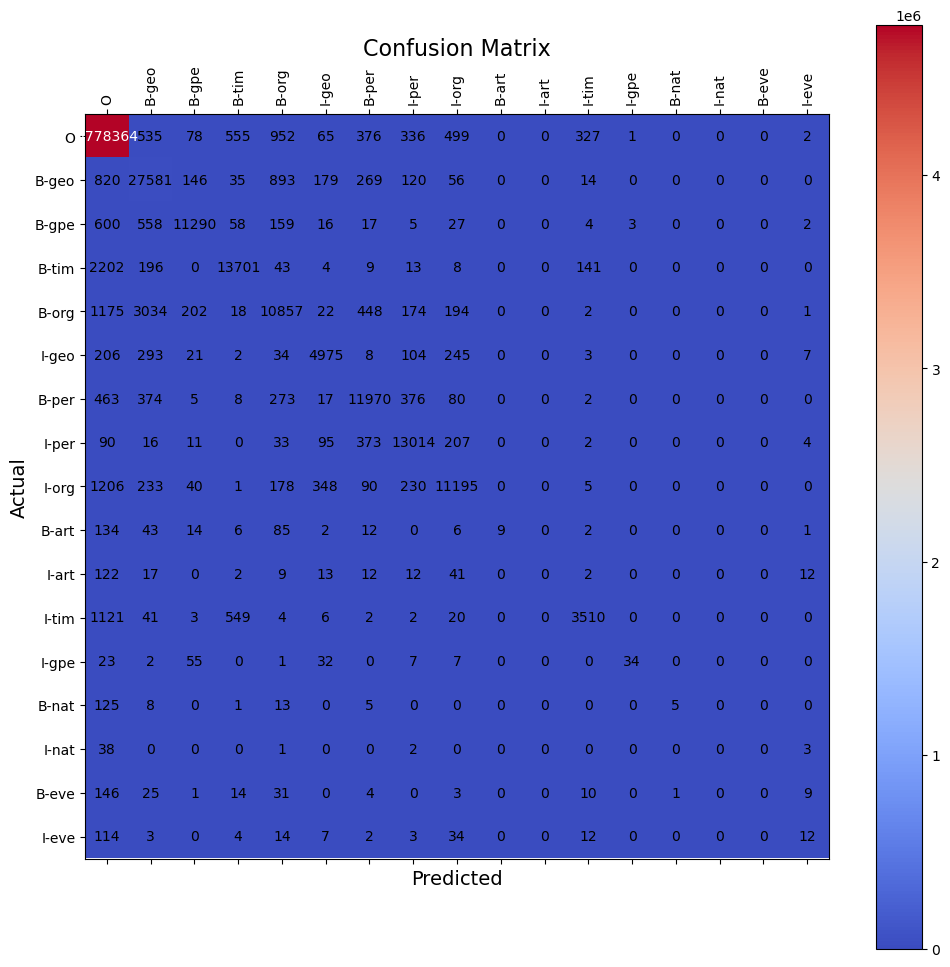

In [132]:
evaluate_lstm(y_train, y_train_pred, tag_dict_rev, tag2idx)

#### Test Dataset

In [133]:
y_test_pred = predict_lstm(lstm_model, X_test)

1199/1199 ━━━━━━━━━━━━━━━━━━━━ 67s 56ms/step


Accuracy: 0.1736
F1 Score: 0.9702


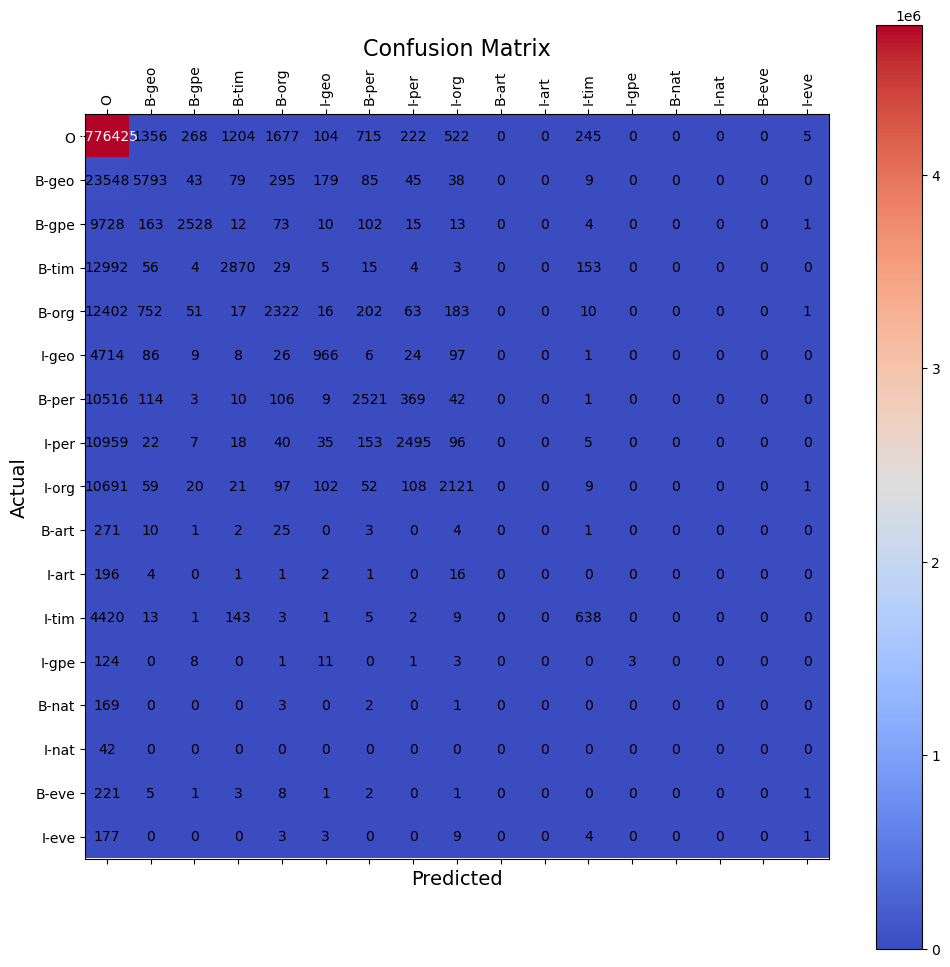

In [134]:
evaluate_lstm(y_test, y_test_pred, tag_dict_rev, tag2idx)

#### Tiny Test Dataset

In [135]:
y_tiny_pred = predict_lstm(lstm_model, X_tiny)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


In [136]:
print_tiny_test_prediction_lstm(X_tiny, y_tiny_pred, word2idx, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O ./O 

The/O programmers/O from/O write/O a/O sentence/O without/O a/O ./O 

Jack/B-per London/I-per went/O to/O ./O 

Jack/B-per London/I-per went/O to/O Paris/B-geo ./O 

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per never/O though/O would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-geo States/I-geo of/O America/I-geo though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/O Arabia/I-geo wanted/O total/O control/O ./O 

Robin/I-per does/O not/O want/O to/O go/O to/O Saudi/O Arabia/I-geo ./O 

Apple/B-org is/O a/O great/O company/O ./O 

I/O really/O love/O apples/O and/O ./O 



Accuracy: 0.5294
F1 Score: 0.9872


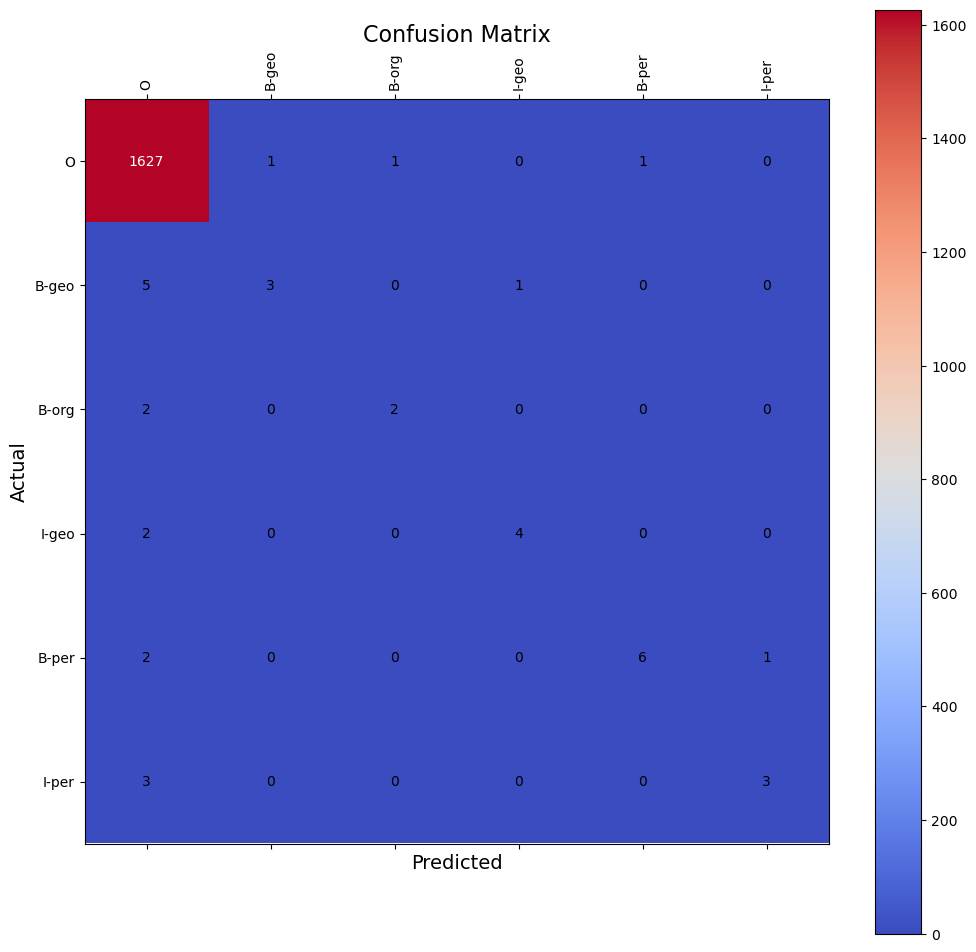

In [137]:
evaluate_lstm(y_tiny, y_tiny_pred, tag_dict_rev, tag2idx)